In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
from statsmodels.graphics.gofplots import qqplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Carga dos dados

In [2]:
# Abrir o datasets
df_pontuacao = pd.read_csv('./datasets/pontuacao_teste.csv')

In [3]:
df_pontuacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horas_estudo     101 non-null    float64
 1   pontuacao_teste  101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [4]:
# Visualizar o dataframe
df_pontuacao.head(5)

,horas_estudo,pontuacao_teste
0,1.1,30
1,2.0,55
2,2.5,60
3,3.6,75
4,4.2,85


In [5]:
# Visualizar final do datafram
df_pontuacao.tail(5)

,horas_estudo,pontuacao_teste
96,46.0,780
97,46.2,785
98,46.4,790
99,46.6,795
100,46.9,800


# EDA

In [6]:
# Medidas estatísticas das  variáveis
df_pontuacao.describe()

,horas_estudo,pontuacao_teste
count,101.000000,101.000000
mean,28.604950,455.000000
std,14.116128,221.385411
min,1.100000,30.000000
25%,16.500000,270.000000
50%,30.900000,465.000000
75%,41.800000,655.000000
max,46.900000,800.000000


<Axes: xlabel='horas_estudo', ylabel='pontuacao_teste'>

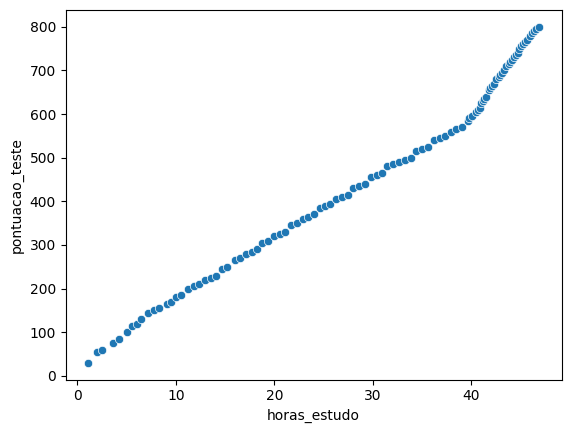

In [7]:
# Plot de dispersão
# X = horas de estudo
# y = pontuacao_teste
sns.scatterplot(data=df_pontuacao, x="horas_estudo", y="pontuacao_teste")

<Axes: ylabel='horas_estudo'>

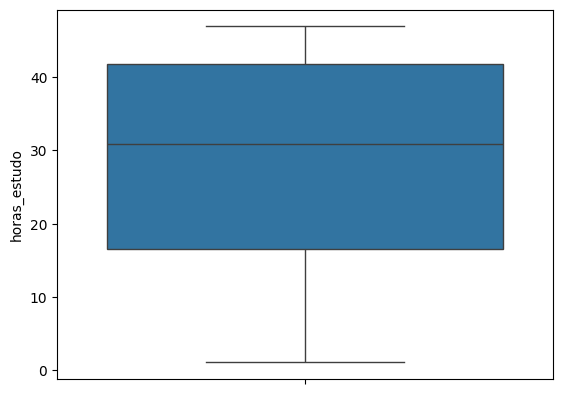

In [8]:
# Verificar se temos outliers - Box-Plot
sns.boxplot(df_pontuacao, y='horas_estudo')

<Axes: ylabel='pontuacao_teste'>

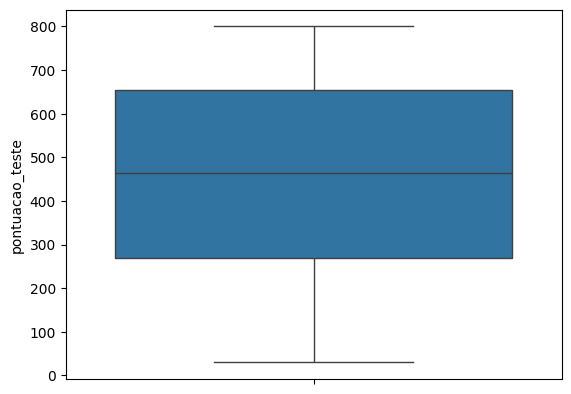

In [9]:
# Verificar se temos outliers - Box-Plot
sns.boxplot(df_pontuacao, y='pontuacao_teste')

<Axes: >

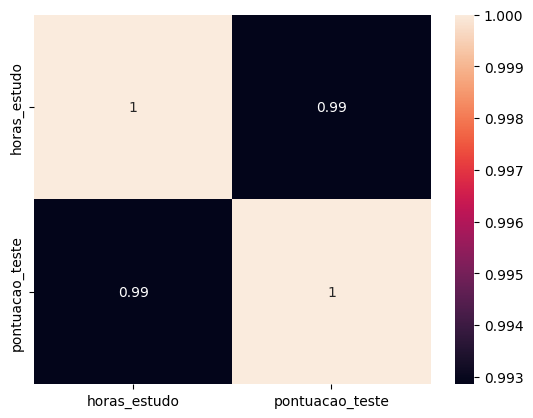

In [10]:
# Verificar a correlação entre as variáveis - Usando Pearson
sns.heatmap(df_pontuacao.corr('pearson'), annot=True)

<Axes: >

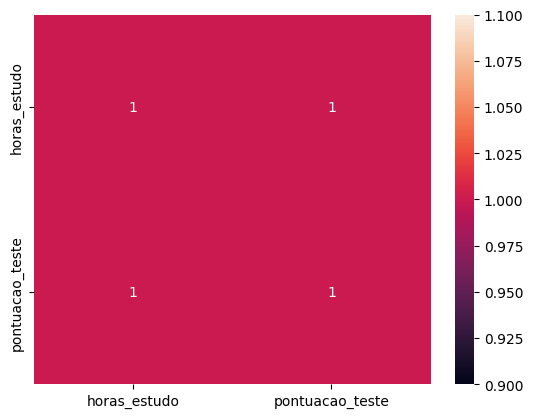

In [11]:
# Verificar a correlação entre as variáveis - Usando Spearman
sns.heatmap(df_pontuacao.corr('spearman'), annot=True)

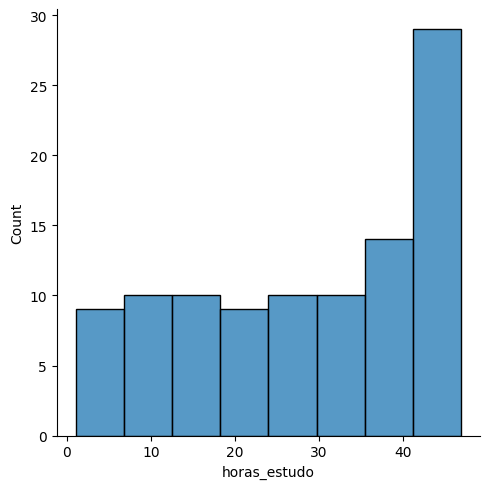

In [18]:
# Histograma das variáveis
sns.displot(df_pontuacao, x='horas_estudo')

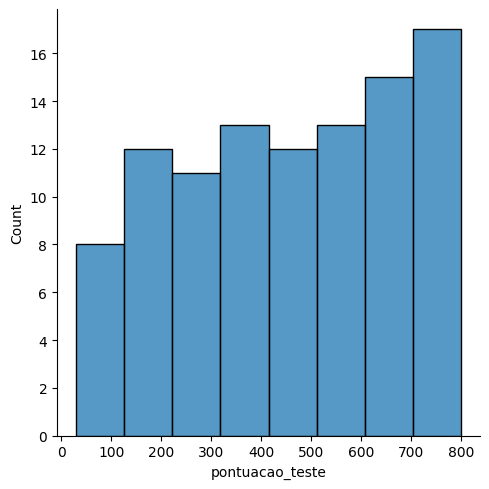

In [19]:
# Histograma das variáveis
sns.displot(df_pontuacao, x='pontuacao_teste')

# Treinar Modelo

In [20]:
# Dividir o dataset entre treino e teste
# Quanto tempos apenas uma feature, precisamos ajustar o shape
X = df_pontuacao['horas_estudo'].values.reshape(-1,1)
y = df_pontuacao['pontuacao_teste'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [21]:
# Instanciar o modelo a ser treinado
reg_model = LinearRegression()

In [22]:
# Treinar o modelo
print("Treinando o modelo...")
reg_model.fit(X_train, y_train)

Treinando o modelo...


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
# Imprimir a equação da reta -> y = ax + b
print("A equação da reta é y = {:4f}x + {:4f}".format(reg_model.coef_[0][0], reg_model.intercept_[0]))

A equação da reta é y = 15.642619x + 8.476601


## Validar o modelo - Métricas

In [24]:
# Predição dos valores com base no conjunto de testes
y_pred = reg_model.predict(X_test)

In [26]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [27]:
# Calcular métrica R-Squared ou Coeficiente de Determinação
# R² representa a proporção na variação na variável dependente que é explicada pela variável independente

r2_score(y_test, y_pred)

0.9828400452912442

In [28]:
# Calcular métrica MAE - Mean Absolute Error
# Representa a diferença entre o valor predito e o valor de teste, tirando a média desses valores
# MAE - Média (y_test - y_pred)
# Métrica fácil de interpretar pois a escala é a escala do valor resposta
# MAE é uma métrica menos sensível a valores extremos (outliers)
mean_absolute_error(y_test, y_pred)

22.957470277134608

In [29]:
# Calcular métrica MSE - Mean Squared Error
# MSE = Média (y_test - y_pred)²
# Não é uma métrica de fácil interpretação e é mais sensível a outliers e penaliza grandes erros
mean_squared_error(y_test, y_pred)

766.9972992416427

In [31]:
# Calcular métrica RMSE - Squared Root Mean Squared Error
# RMSE - É uma métrica fácil de interpretar
# RMSE - Continua sendo sensível a outliers e penalizando grandes erros
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_test, y_pred)

27.69471608884342

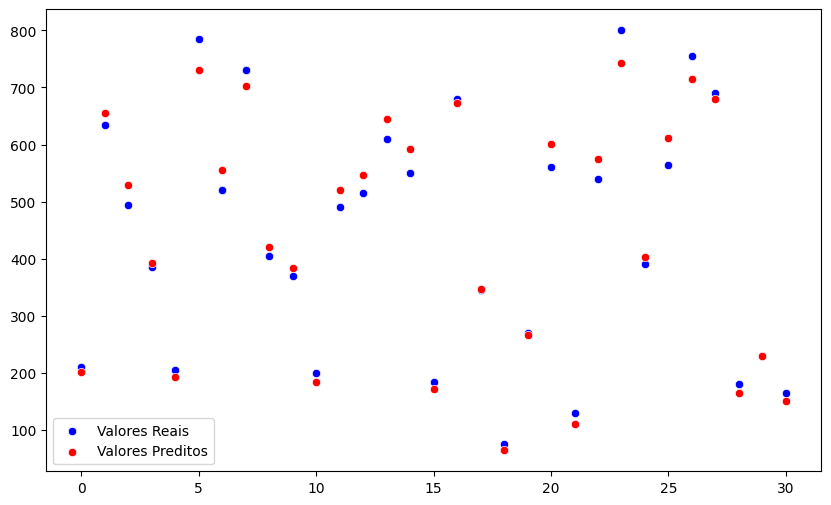

In [32]:
# Análise gráfica
x_axis = range(len(y_test))
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_axis, y=y_test.reshape(-1), color='blue', label='Valores Reais')
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color='red', label='Valores Preditos')
plt.legend()
plt.show()

## Análise de Resíduos

In [33]:
# Calcular resíduos
# Resíduos - É a diferença entre os valores reais e os preditos 
residuos = y_test - y_pred

In [35]:
# Calcular os resíduos padronizados (standardization)
# Para cada elemento deste conjunto (X - média) / desvio_padrão

from scipy.stats import zscore

residuos_std = zscore(residuos)

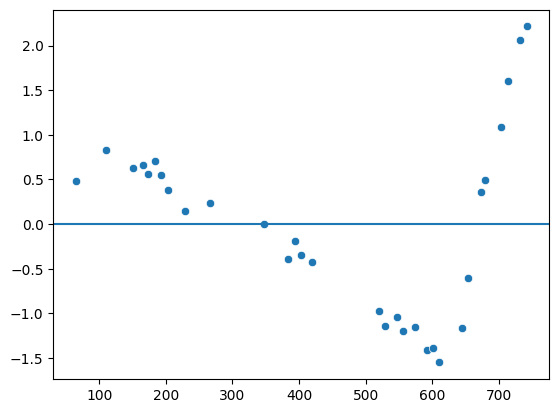

In [37]:
# Verificar a linearidade do modelo:
# Se os resíduos entre -2 e +2 (na escala padrão) indica linearidade

# Verificar a homogeneidade das variâncias (Homoscedasticidade)
# Valores estiver em torno da reta, temos a homoscedasticidade caso contrário se tivermos alguma tendência ou padrão (forma um cone, funil), há heteroscedasticidade

sns.scatterplot(x=y_pred.reshape(-1), y=residuos_std.reshape(-1))
plt.axhline(y=0)

Text(0, 0.5, 'Resíduos na escala padrão')

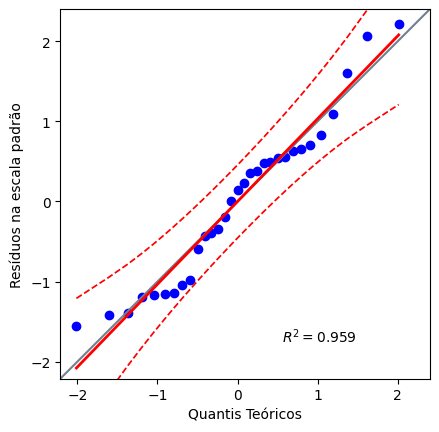

In [38]:
# Chegar se resíduos seguem uma distribuição normal
# QQ (Quantile-Quantile) Plot, que avalia de uma amostra segue uma distribuição normal

import pingouin as pg

pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos na escala padrão')

In [39]:
# Teste de normalidade - Shapiro-Wilk
# H0 - Os dados parecem seguir uma distribuição normal
# H1 - Os dados não seguem uma distribuição normal
# Se o p-valor > 0.05 não rejeita H0, caso contrário rejeitamos

stat_shapiro, p_valor_shapiro = shapiro(residuos.reshape(-1))
print(f"Estatística do  teste: {stat_shapiro} e P-Valor: {p_valor_shapiro}")


Estatística do  teste: 0.9500532226161755 e P-Valor: 0.15663817850304637


In [40]:
# Teste de normalidade - Kolmogorov-Smirnov
# H0 - Os dados parecem seguir uma distribuição normal
# H1 - Os dados não seguem uma distribuição normal
# Se o p-valor > 0.05 não rejeita H0, caso contrário rejeitamos

stat_ks, p_valor_ks = kstest(residuos.reshape(-1), 'norm')
print(f"Estatística do  teste: {stat_ks} e P-Valor: {p_valor_ks}")


Estatística do  teste: 0.48355808450512827 e P-Valor: 3.395368995814077e-07


# Fazer predições com o modelo

In [41]:
# Se eu estudar 30.4 horas, qual a minha pontuação prevista pelo modelo?

reg_model.predict([[30.4]])

array([[484.01220436]])

In [42]:
# Quantas horas preciso estudar para obter uma pontuação de 600 pontos, pelo modelo?
# y = ax + b
# y - b = ax
# (y -b) / a = x
# x = (y - b) / a

(600 - reg_model.intercept_[0]) / reg_model.coef_[0][0]

np.float64(37.81485802710669)

## Salvar modelo para usar depois

In [43]:
import joblib

joblib.dump(reg_model, './modelo_regressao.pkl')

['./modelo_regressao.pkl']